# Project 8: Online Shopping Purchase Intent Detection
#### By Group 6
# Part 1b

In [1]:
import numpy as np
from IPython.display import display,HTML
import warnings
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

from sklearn import svm, datasets

from  numpy import *
import matplotlib.pyplot as plt  
import pandas as pd 

np.set_printoptions(suppress=True)

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

## Reading, Readying, and Plotting the Data


## Reading in the Data

The first step is to load the data. The data for this part is provided in a csv file called group6_test.csv which contains 18 columns of data: Columns from 1 until 17 represent the data of which the buyer will buy or not; the last column represents whether the customer eventually made a purchase (1) or not (0). I've graciously put in the code to import numpy and to import the data as a numpy array into the variable data1. I've also put in code that uses the pandas library to display the top 9 rows of the data (this comes very in handy when you want to get a preview of what the data looks like).


In [2]:
### Importing some useful packages
#This ensures that plots appear in the sheet and not in a new window
%matplotlib inline 
import numpy as np

#Pandas is an alternative numerical processing library like numpy: they have differences
#We will use Pandas only to provide a preview of the data once we've read it in
import pandas as pd


#DataIn = np.genfromtxt('group6_train.csv',delimiter=",")

#Convert the numpy array to a pandas DataFrame
#and display the first 10 rows as html
DataIn = loadtxt('group6_train.dat')

print("\nTraining data: "+(str)(len(DataIn)))
display(pd.DataFrame(DataIn).head(10))
DataIn2 = loadtxt('group6_cv.dat')

print("\nCV data: "+(str)(len(DataIn2)))

display(pd.DataFrame(DataIn2).head(10))



Training data: 2289


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,5.0,1415.0,0.0,0.0,34.0,588.0,0.0,0.0,8.0,0.0,8.0,2.0,5.0,1.0,1.0,2.0,0.0,1.0
1,2.0,28.0,0.0,0.0,73.0,2260.0,0.0,0.0,0.0,0.0,6.0,2.0,2.0,7.0,4.0,2.0,1.0,0.0
2,6.0,149.0,3.0,267.0,120.0,3934.0,0.0,0.0,8.0,0.0,11.0,2.0,2.0,4.0,2.0,2.0,1.0,0.0
3,8.0,97.0,0.0,0.0,24.0,498.0,0.0,0.0,5.0,0.0,10.0,2.0,2.0,1.0,2.0,2.0,0.0,1.0
4,2.0,21.0,1.0,802.0,48.0,2073.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,3.0,2.0,2.0,1.0,0.0
5,4.0,24.0,0.0,0.0,29.0,749.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,3.0,2.0,2.0,0.0,1.0
6,0.0,0.0,0.0,0.0,20.0,1117.0,0.0,0.0,0.0,0.0,3.0,2.0,4.0,7.0,2.0,2.0,0.0,0.0
7,1.0,75.0,0.0,0.0,20.0,1173.0,0.0,0.0,21.0,0.0,11.0,3.0,2.0,8.0,11.0,2.0,0.0,1.0
8,2.0,6.0,0.0,0.0,9.0,89.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,4.0,4.0,2.0,1.0,1.0
9,4.0,206.0,0.0,0.0,9.0,113.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,1.0,6.0,2.0,0.0,0.0



CV data: 763


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,3.0,3.0,2.0,0.0,0.0
1,5.0,73.0,1.0,55.0,41.0,1705.0,0.0,0.0,7.0,0.0,5.0,2.0,4.0,2.0,2.0,2.0,0.0,0.0
2,14.0,160.0,6.0,1079.0,154.0,7405.0,0.0,0.0,8.0,0.0,11.0,4.0,1.0,4.0,1.0,2.0,0.0,1.0
3,8.0,203.0,0.0,0.0,116.0,3505.0,0.0,0.0,62.0,0.0,11.0,2.0,2.0,1.0,6.0,2.0,0.0,1.0
4,0.0,0.0,0.0,0.0,12.0,312.0,0.0,0.0,17.0,0.0,5.0,2.0,2.0,8.0,6.0,2.0,0.0,1.0
5,0.0,0.0,0.0,0.0,24.0,968.0,0.0,0.0,106.0,0.0,11.0,1.0,1.0,9.0,2.0,2.0,0.0,1.0
6,9.0,441.0,0.0,0.0,122.0,2577.0,0.0,0.0,75.0,0.0,11.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0
7,3.0,68.0,1.0,103.0,10.0,808.0,0.0,0.0,35.0,0.0,3.0,2.0,2.0,3.0,7.0,2.0,1.0,1.0
8,2.0,561.0,2.0,31.0,95.0,4817.0,0.0,0.0,50.0,0.0,11.0,1.0,1.0,5.0,2.0,2.0,0.0,1.0
9,5.0,415.0,0.0,0.0,115.0,4424.0,0.0,0.0,13.0,0.0,8.0,2.0,4.0,4.0,1.0,2.0,1.0,1.0


In [3]:

#Set m and n
m = DataIn.shape[0]
n = DataIn.shape[1]-1 #The final column is not a feature; it's the target variable


#Set X and y
#I'm putting in reshapes on the single-column matrices to explicitly ensure that they
#aren't rank 1 arrays i.e. their shapes aren't weird "(m,)" but rather "(m,1)" 
X = DataIn[:,0:n]
y = DataIn[:,n].reshape(m,1)



print("X_train:")
display(pd.DataFrame(X).head(10))

print("\ny_train:")
display(pd.DataFrame(y).head(10))



X_train:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,5.0,1415.0,0.0,0.0,34.0,588.0,0.0,0.0,8.0,0.0,8.0,2.0,5.0,1.0,1.0,2.0,0.0
1,2.0,28.0,0.0,0.0,73.0,2260.0,0.0,0.0,0.0,0.0,6.0,2.0,2.0,7.0,4.0,2.0,1.0
2,6.0,149.0,3.0,267.0,120.0,3934.0,0.0,0.0,8.0,0.0,11.0,2.0,2.0,4.0,2.0,2.0,1.0
3,8.0,97.0,0.0,0.0,24.0,498.0,0.0,0.0,5.0,0.0,10.0,2.0,2.0,1.0,2.0,2.0,0.0
4,2.0,21.0,1.0,802.0,48.0,2073.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,3.0,2.0,2.0,1.0
5,4.0,24.0,0.0,0.0,29.0,749.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,3.0,2.0,2.0,0.0
6,0.0,0.0,0.0,0.0,20.0,1117.0,0.0,0.0,0.0,0.0,3.0,2.0,4.0,7.0,2.0,2.0,0.0
7,1.0,75.0,0.0,0.0,20.0,1173.0,0.0,0.0,21.0,0.0,11.0,3.0,2.0,8.0,11.0,2.0,0.0
8,2.0,6.0,0.0,0.0,9.0,89.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,4.0,4.0,2.0,1.0
9,4.0,206.0,0.0,0.0,9.0,113.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,1.0,6.0,2.0,0.0



y_train:


,0
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
5,1.0
6,0.0
7,1.0
8,1.0
9,0.0


### Visualizing the Data (If Possible)

Once loaded, it is a good idea to try  and visualise the data. Generally in data science, visualising the data is recommended (where possible) in order to give you a sense of the underlying structure of the data and/or the kind of function that you may need to use as a decision boundary. However, **note** that for more than two features in a classification model, this is not possible, unless you plot them in pairs, or something like that...


SO, first start by filling in the function below which should index into ```X``` to filter out 0 and 1 examples based on their corresponding ```y``` labels and return them into the relevant array variables.

**NOTE:** You should _absolutely_ avoid looping through ```X``` using a loop of any sort. Rather, use numpy array boolean indexing to filter out ```X```.


In [4]:

#Set m and n
m2 = DataIn2.shape[0]
n2 = DataIn2.shape[1]-1 #The final column is not a feature; it's the target variable


#Set X and y
#I'm putting in reshapes on the single-column matrices to explicitly ensure that they
#aren't rank 1 arrays i.e. their shapes aren't weird "(m,)" but rather "(m,1)" 
X2 = DataIn2[:,0:n]
y2 = DataIn2[:,n].reshape(m2,1)



print("X_pred:")
display(pd.DataFrame(X).head(10))

print("\ny_pred:")
display(pd.DataFrame(y).head(10))



X_pred:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,5.0,1415.0,0.0,0.0,34.0,588.0,0.0,0.0,8.0,0.0,8.0,2.0,5.0,1.0,1.0,2.0,0.0
1,2.0,28.0,0.0,0.0,73.0,2260.0,0.0,0.0,0.0,0.0,6.0,2.0,2.0,7.0,4.0,2.0,1.0
2,6.0,149.0,3.0,267.0,120.0,3934.0,0.0,0.0,8.0,0.0,11.0,2.0,2.0,4.0,2.0,2.0,1.0
3,8.0,97.0,0.0,0.0,24.0,498.0,0.0,0.0,5.0,0.0,10.0,2.0,2.0,1.0,2.0,2.0,0.0
4,2.0,21.0,1.0,802.0,48.0,2073.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,3.0,2.0,2.0,1.0
5,4.0,24.0,0.0,0.0,29.0,749.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,3.0,2.0,2.0,0.0
6,0.0,0.0,0.0,0.0,20.0,1117.0,0.0,0.0,0.0,0.0,3.0,2.0,4.0,7.0,2.0,2.0,0.0
7,1.0,75.0,0.0,0.0,20.0,1173.0,0.0,0.0,21.0,0.0,11.0,3.0,2.0,8.0,11.0,2.0,0.0
8,2.0,6.0,0.0,0.0,9.0,89.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,4.0,4.0,2.0,1.0
9,4.0,206.0,0.0,0.0,9.0,113.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,1.0,6.0,2.0,0.0



y_pred:


,0
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
5,1.0
6,0.0
7,1.0
8,1.0
9,0.0


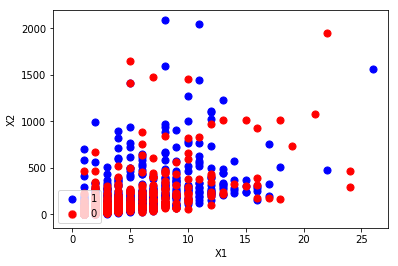

In [5]:
X_training= X


y_training= y.squeeze()

y_training = np.where(y_training, 1, 0)
plt.scatter(X_training[y_training ==1, 0],X_training[y_training ==1, 1],c='b',s=50)
plt.scatter(X_training[y_training ==0, 0],X_training[y_training== 0, 1],c='r',s=50)
plt.legend(["1", "0"],loc=3)
plt.xlabel('X1')
plt.ylabel('X2');
plt.savefig('nl-chart0.png')

### Feature Scaling 


The dataset contains features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.

these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, for e.g 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.
To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

### How is the  StandardScaler achieved 


The standard score of a sample x is calculated as:

    z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

For e.g. an Employee dataset will contain AGE column with values on scale 20-70 and SALARY column with values on scale 10000-80000.

In [6]:

from sklearn.preprocessing import StandardScaler

def getScaledX(X):
    X_scaled = np.zeros(X.shape)
    scaler = None
    
    #FILL IN BELOW:
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    #STOP FILLING IN HERE
    
    return X_scaled,scaler


X_scaled,scalerpt1 = getScaledX(X)

X_scaled2,scalerpt1 = getScaledX(X2)

In [7]:
#Don't change in any way
X_mod = np.hstack([np.ones((m,1)),X_scaled]) #Add a column of 1s to X which will serve as the so-called x_0 feature: store the result in X_mod which we'll be using from now on
X_mod1 = np.hstack([np.ones((m2,1)),X_scaled2]) #Add a column of 1s to X which will serve as the so-called x_0 feature: store the result in X_mod which we'll be using from now on

#Preview contents of X_mod with Pandas
#pd.DataFrame(X_mod).head(10)
pd.DataFrame(X_mod1).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,-0.795042,-0.535945,-0.500799,-0.315759,-0.766956,-0.678459,0.0,0.0,-0.512259,-0.11524,-1.822395,0.908174,-0.245173,-0.131745,-0.305351,0.467373,-0.591982
1,1.0,0.607865,-0.138067,0.218805,0.063562,0.068042,0.117148,0.0,0.0,-0.288677,-0.11524,-0.922597,-0.115366,0.796982,-0.535445,-0.536714,0.467373,-0.591982
2,1.0,3.133096,0.336117,3.816824,7.125838,2.426911,2.776949,0.0,0.0,-0.256737,-0.11524,0.876998,1.931715,-0.766250,0.271955,-0.768077,0.467373,-0.591982
3,1.0,1.449609,0.570483,-0.500799,-0.315759,1.633663,0.957085,0.0,0.0,1.468041,-0.11524,0.876998,-0.115366,-0.245173,-0.939145,0.388739,0.467373,-0.591982
4,1.0,-0.795042,-0.535945,-0.500799,-0.315759,-0.537331,-0.532870,0.0,0.0,0.030726,-0.11524,-0.922597,-0.115366,-0.245173,1.886755,0.388739,0.467373,-0.591982
5,1.0,-0.795042,-0.535945,-0.500799,-0.315759,-0.286832,-0.226760,0.0,0.0,2.873416,-0.11524,0.876998,-1.138907,-0.766250,2.290454,-0.536714,0.467373,-0.591982
6,1.0,1.730190,1.867674,-0.500799,-0.315759,1.758912,0.524051,0.0,0.0,1.883265,-0.11524,0.876998,-1.138907,-0.766250,-0.939145,-0.536714,0.467373,-0.591982
7,1.0,0.046702,-0.165319,0.218805,0.394606,-0.579081,-0.301421,0.0,0.0,0.605652,-0.11524,-1.522462,-0.115366,-0.245173,-0.131745,0.620102,0.467373,1.689241
8,1.0,-0.233879,2.521721,0.938409,-0.101960,1.195289,1.569306,0.0,0.0,1.084757,-0.11524,0.876998,-1.138907,-0.766250,0.675655,-0.536714,0.467373,-0.591982
9,1.0,0.607865,1.725964,-0.500799,-0.315759,1.612788,1.385920,0.0,0.0,-0.097035,-0.11524,-0.022800,-0.115366,0.796982,0.271955,-0.768077,0.467373,1.689241


### Regularization Cost parameter and gamma paramter

The SVM model will be trained using different 8 cost functions and also 8 gammas in order to obatied the best combination to be able to find the best CV accuracy. all the gammas and cost functions were given in the project discriptions. Each accuracy obtained will be put into the list then the best accuracy and the gama and cost cost parametr that yields it will be used into our model.At the end we will have 64 accuracy core in a list. 

In [8]:
from sklearn.metrics import accuracy_score

C_2d_range = [0.125, 0.5, 2, 8, 32, 128, 512, 2048]
yre = 0;
gamma_2d_range = [4.8828125*10**-4, 1.953125*10**-3, 7.8125*10**-3, 0.03125,0.125, 0.5, 2, 8]
classifiers = []
acur = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_scaled, y.squeeze())
        classifiers.append((C, gamma, clf))
        yre=clf.predict(X_scaled2)
        acur.append(accuracy_score(y2, yre))


## Printing all accurancy in an array, In total they are 64

In [9]:
print(acur)

print(acur[56])
print(classifiers[56])

[0.6998689384010485, 0.6736566186107471, 0.7352555701179554, 0.7601572739187418, 0.7496723460026212, 0.6684141546526867, 0.5557011795543906, 0.4980340760157274, 0.6775884665792923, 0.7391874180865007, 0.7745740498034076, 0.7955439056356488, 0.781127129750983, 0.7300131061598951, 0.6513761467889908, 0.5530799475753604, 0.7404980340760158, 0.7824377457404981, 0.8047182175622543, 0.8165137614678899, 0.7981651376146789, 0.7680209698558322, 0.690694626474443, 0.6343381389252949, 0.781127129750983, 0.8007863695937091, 0.8125819134993447, 0.8191349934469201, 0.781127129750983, 0.762778505897772, 0.6880733944954128, 0.6317169069462647, 0.8047182175622543, 0.8138925294888598, 0.8204456094364351, 0.8099606815203145, 0.7732634338138925, 0.745740498034076, 0.690694626474443, 0.6317169069462647, 0.8152031454783748, 0.8243774574049804, 0.8204456094364351, 0.7929226736566186, 0.7404980340760158, 0.7522935779816514, 0.6920052424639581, 0.6317169069462647, 0.8217562254259502, 0.8256880733944955, 0.8191

## The best accurancy score is 83 along with its corresponding gamma and cost parameter of 2048 and 0.00048828125

### FInal model with the desired Cost parameter and Gamma


In [10]:
clf1 = SVC(C=2048, gamma=0.00048828125)
clf1.fit(X_scaled, y.squeeze())

yre1=clf1.predict(X_scaled2)

print(accuracy_score(y2, yre1))



0.8269986893840104


### OBTAINING THE CONFUSION MATRICX AND VIRTIUALISING IT 

[[351  35]
 [ 97 280]]


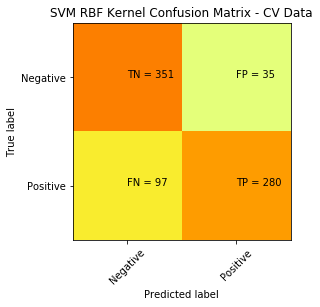

In [11]:
import sklearn.metrics as sklm
from sklearn.metrics import confusion_matrix

sklm.confusion_matrix(y_true=y2,y_pred=yre1)

from sklearn.metrics import accuracy_score


predicted = clf1.predict(X_scaled2)

#print("The acuurancy score is ",accuracy_score(y, predicted)*100)

cm = confusion_matrix(y2, predicted)
print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVM RBF Kernel Confusion Matrix - CV Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


In [12]:
import sklearn.metrics as sklm


def getMetricsSKL(ytrue,ypred):
    acc = 0
    rec = 0
    prec = 0
    f1 = 0
    
    #FILL IN HERE: Set all of the variables above correctly
    acc = sklm.accuracy_score(ytrue, ypred)
    rec = sklm.recall_score(ytrue, ypred)
    prec = sklm.precision_score(ytrue, ypred)
    f1 = sklm.f1_score(ytrue, ypred)
    #STOP FILLING IN HERE
    
    return acc,rec,prec,f1


accskl,recskl,precskl,f1skl = getMetricsSKL(y2,yre1)
SVMresult = [accskl*100,recskl*100,precskl*100,f1skl*100]

## Vitualising The results

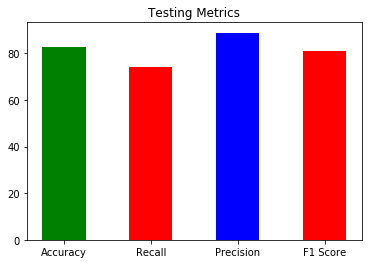


From the graph above we can see that:

 	 	Support Vector Machine has an Accuracy of 83.0%

 	 	Support Vector Machine has an recall of 74.0%

 	 	Support Vector Machine has an Precision  of 89.0%

 	 	Support Vector Machine has an f1-score of 81.0%


In [13]:
titles = "Accuracy","Recall", "Precision", "F1 Score"
temp = [SVMresult[0],SVMresult[1],SVMresult[2],SVMresult[3]]

plt.title("Testing Metrics")
plt.bar(titles[0], temp[0], color ='g', width = 0.5)
plt.bar(titles[1], temp[1], color ='r', width = 0.5)
plt.bar(titles[2], temp[2], color ='b', width = 0.5)
plt.bar(titles[3], temp[3], color ='r', width = 0.5)

plt.show()

print("\nFrom the graph above we can see that:")
print("\n \t \tSupport Vector Machine has an Accuracy of " + str(round(temp[0])) +"%")
print("\n \t \tSupport Vector Machine has an recall of " + str(round(temp[1])) +"%")
print("\n \t \tSupport Vector Machine has an Precision  of " + str(round(temp[2])) +"%")
print("\n \t \tSupport Vector Machine has an f1-score of " + str(round(temp[3])) +"%")

